In [247]:
import os
os.listdir()

['top-up-planning.xlsx',
 '.DS_Store',
 'consumptions per guest.csv',
 '~$top-up-planning.xlsx',
 'Festival Analysis.ipynb',
 'guests.csv',
 'tsv-data.zip',
 '.ipynb_checkpoints',
 'items.csv',
 'tmp']

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [252]:
orders = pd.read_csv("tmp/files/orders.csv", sep = '\t')
orders.head(30)

,order_id,timestamp,guest_id,location_id
0,5534725,2019-07-19 10:59:54,895058,2271
1,5539203,2019-07-19 12:40:27,895058,2205
2,5542976,2019-07-19 14:13:13,895058,2113
3,5551640,2019-07-19 17:03:49,895058,2253
4,5551659,2019-07-19 17:04:03,895058,2176
5,5555192,2019-07-19 17:57:06,895058,2197
6,5555254,2019-07-19 17:57:58,895058,2197
7,5562706,2019-07-19 19:17:40,895058,2191
8,5563890,2019-07-19 19:28:09,895058,2174
9,5567409,2019-07-19 20:00:19,895058,2197


In [253]:
items = pd.read_csv("items.csv", sep = ';')
items.head()

,item_id,item_name,category,department
0,196,5,nos,other
1,747,10,nos,other
2,1836,Duschen,facilities,non_food
3,2092,Cocktails,spirit,drinks
4,2102,Shots,spirit,drinks


In [254]:
orders

,order_id,timestamp,guest_id,location_id
0,5534725,2019-07-19 10:59:54,895058,2271
1,5539203,2019-07-19 12:40:27,895058,2205
2,5542976,2019-07-19 14:13:13,895058,2113
3,5551640,2019-07-19 17:03:49,895058,2253
4,5551659,2019-07-19 17:04:03,895058,2176
...,...,...,...,...
341419,5824953,2019-07-22 01:18:29,930178,2149
341420,5825673,2019-07-22 01:25:19,930179,2185
341421,5828708,2019-07-22 02:01:52,930180,2161
341422,5828870,2019-07-22 02:04:16,930180,2166


In [255]:
orders.set_index("guest_id")

,order_id,timestamp,location_id
guest_id,,,
895058,5534725,2019-07-19 10:59:54,2271
895058,5539203,2019-07-19 12:40:27,2205
895058,5542976,2019-07-19 14:13:13,2113
895058,5551640,2019-07-19 17:03:49,2253
895058,5551659,2019-07-19 17:04:03,2176
...,...,...,...
930178,5824953,2019-07-22 01:18:29,2149
930179,5825673,2019-07-22 01:25:19,2185
930180,5828708,2019-07-22 02:01:52,2161


In [256]:
orders2 = orders.loc[1:25]

In [257]:
orders2

,order_id,timestamp,guest_id,location_id
1,5539203,2019-07-19 12:40:27,895058,2205
2,5542976,2019-07-19 14:13:13,895058,2113
3,5551640,2019-07-19 17:03:49,895058,2253
4,5551659,2019-07-19 17:04:03,895058,2176
5,5555192,2019-07-19 17:57:06,895058,2197
6,5555254,2019-07-19 17:57:58,895058,2197
7,5562706,2019-07-19 19:17:40,895058,2191
8,5563890,2019-07-19 19:28:09,895058,2174
9,5567409,2019-07-19 20:00:19,895058,2197
10,5570978,2019-07-19 20:27:10,895058,2253


<AxesSubplot:xlabel='timestamp'>

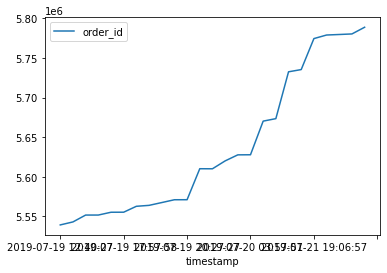

In [10]:
orders2.plot.line(x = "timestamp",y = "order_id")

In [258]:
orders['order_id'].value_counts()

5534725    1
5802408    1
5800566    1
5791112    1
5781820    1
          ..
5803142    1
5798601    1
5786311    1
5783227    1
5849996    1
Name: order_id, Length: 341424, dtype: int64

In [259]:
correlations = pd.read_csv('tmp/files/correlations.csv', sep = '\t')
correlations.head()

,category_1,category_2,correlation
0,beer,drinks_nos,0.081080
1,beer,energy_drink,0.063981
2,beer,hot_drinks,0.074430
3,beer,soft_drink,0.267354
4,beer,spirit,0.097544


In [260]:
correlations['correlation'].max()

0.5783243006637385

In [261]:
correlations_2 = correlations.nlargest(20, ['correlation'])
correlations_2

,category_1,category_2,correlation
197,fast_food,total_order_tkn,0.578324
492,total_order_tkn,fast_food,0.578324
146,tap_beer,deposit,0.570354
336,deposit,tap_beer,0.570354
109,soft_drink,total_order_tkn,0.555903
488,total_order_tkn,soft_drink,0.555903
131,spirit,total_order_tkn,0.548950
489,total_order_tkn,spirit,0.548950
351,deposit,total_order_tkn,0.506588
499,total_order_tkn,deposit,0.506588


In [262]:
correlations.drop(correlations.index[correlations['category_1'] == 'total_order_tkn'], inplace = True)

In [263]:
correlations.drop(correlations.index[correlations['category_2'] == 'total_order_tkn'], inplace = True)

In [264]:
correlations_2 = correlations.nlargest(20, ['correlation'])
correlations_2

,category_1,category_2,correlation
146,tap_beer,deposit,0.570354
336,deposit,tap_beer,0.570354
14,beer,deposit,0.376699
330,deposit,beer,0.376699
124,spirit,deposit,0.327995
335,deposit,spirit,0.327995
95,soft_drink,fast_food,0.315947
180,fast_food,soft_drink,0.315947
102,soft_drink,deposit,0.299066
334,deposit,soft_drink,0.299066


In [265]:
correlations_2.shape

(20, 3)

In [266]:
correlations_2.drop_duplicates().shape

(20, 3)

##  Q: What is the combination of products that are sold the most?



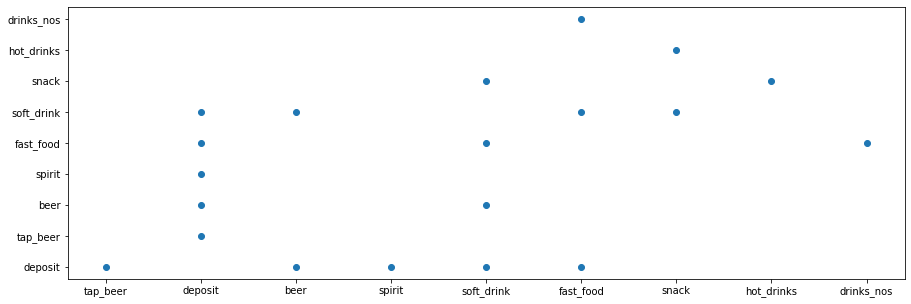

In [46]:
plt.figure(figsize = [15, 5])
plt.scatter(data=correlations_2,x='category_1',y='category_2')




The correlations show which 2 products had sold the most and had the best combination together

- first we can see correlations_2 is a table of the dataset with the 5 highest correlations, and the graph states the following for the 5 highest combinations
 * 1) tap_beer and deposit has the highest correlations and selling point
 * 2) beer and deposit has the 2nd highest correlations
 * 3) spirit and deposit has the 3rd highest correlations
 * 4) soft_drink and fast_food has the 4th highest
 * 5) soft drink and deposit has the 5th highest



In [53]:
correlations_3 = correlations.nlargest(20, ['correlation'])
correlations_3

,category_1,category_2,correlation
146,tap_beer,deposit,0.570354
336,deposit,tap_beer,0.570354
14,beer,deposit,0.376699
330,deposit,beer,0.376699
124,spirit,deposit,0.327995
335,deposit,spirit,0.327995
95,soft_drink,fast_food,0.315947
180,fast_food,soft_drink,0.315947
102,soft_drink,deposit,0.299066
334,deposit,soft_drink,0.299066


In [55]:
correlations_3.drop(['correlation'], axis=1, inplace = True)

In [58]:
correlations_3

,category_1,category_2
146,tap_beer,deposit
336,deposit,tap_beer
14,beer,deposit
330,deposit,beer
124,spirit,deposit
335,deposit,spirit
95,soft_drink,fast_food
180,fast_food,soft_drink
102,soft_drink,deposit
334,deposit,soft_drink


In [82]:
correlations.drop([330, 335, 180, 3],axis=0,inplace = True)

In [83]:
correlations_3 = correlations.nlargest(5, ['correlation'])
correlations_3

,category_1,category_2,correlation
146,tap_beer,deposit,0.570354
14,beer,deposit,0.376699
124,spirit,deposit,0.327995
95,soft_drink,fast_food,0.315947
102,soft_drink,deposit,0.299066


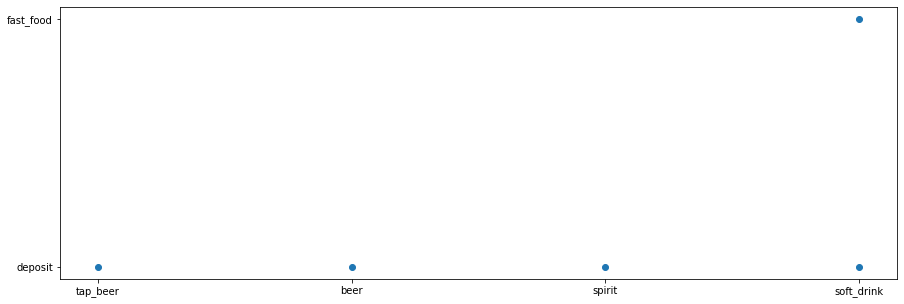

In [85]:
plt.figure(figsize = [15, 5])
plt.scatter(data=correlations_3,x='category_1',y='category_2')

first we can see correlations_2 is a table of the dataset with the 5 highest correlations, and the graph states the following for the 5 highest combinations
* 1) tap beer and deposit make up the highest combination
* 2) beer and deposit make the 2nd highest combination
* 3) spirit and deposit make the 3rd highest combination
* 4) soft_drink and fast_food make the 4th highest combination
* 5) soft_drink and deposit make the 5th highest combination

# Find top 5 items when people enter the festival

In [267]:
orders

,order_id,timestamp,guest_id,location_id
0,5534725,2019-07-19 10:59:54,895058,2271
1,5539203,2019-07-19 12:40:27,895058,2205
2,5542976,2019-07-19 14:13:13,895058,2113
3,5551640,2019-07-19 17:03:49,895058,2253
4,5551659,2019-07-19 17:04:03,895058,2176
...,...,...,...,...
341419,5824953,2019-07-22 01:18:29,930178,2149
341420,5825673,2019-07-22 01:25:19,930179,2185
341421,5828708,2019-07-22 02:01:52,930180,2161
341422,5828870,2019-07-22 02:04:16,930180,2166


In [268]:
items.head()

,item_id,item_name,category,department
0,196,5,nos,other
1,747,10,nos,other
2,1836,Duschen,facilities,non_food
3,2092,Cocktails,spirit,drinks
4,2102,Shots,spirit,drinks


In [269]:
lineitems = pd.read_csv('tmp/files/lineitems.csv', sep = '\t')
lineitems.head()

,lineitem_id,order_id,item_id,quantity
0,7078862,5534725,7226,1
1,7084349,5539203,6577,1
2,7088719,5542976,7064,1
3,7099035,5551640,7287,1
4,7099058,5551659,6127,1


In [95]:
orders['guest_id'].value_counts()

893310    81
895582    77
904247    73
915877    71
915281    71
          ..
929019     1
929020     1
910000     1
902029     1
930205     1
Name: guest_id, Length: 23192, dtype: int64

In [8]:
orders2 = orders.set_index('guest_id')
orders2.head()

,order_id,timestamp,location_id
guest_id,,,
895058,5534725,2019-07-19 10:59:54,2271
895058,5539203,2019-07-19 12:40:27,2205
895058,5542976,2019-07-19 14:13:13,2113
895058,5551640,2019-07-19 17:03:49,2253
895058,5551659,2019-07-19 17:04:03,2176


In [105]:
orders2

,order_id,timestamp,location_id
guest_id,,,
895058,5534725,2019-07-19 10:59:54,2271
895058,5539203,2019-07-19 12:40:27,2205
895058,5542976,2019-07-19 14:13:13,2113
895058,5551640,2019-07-19 17:03:49,2253
895058,5551659,2019-07-19 17:04:03,2176
...,...,...,...
930178,5824953,2019-07-22 01:18:29,2149
930179,5825673,2019-07-22 01:25:19,2185
930180,5828708,2019-07-22 02:01:52,2161


item1

In [112]:
orders2.loc[893310, ["order_id","timestamp"]]

,order_id,timestamp
guest_id,,
893310,5517552,2019-07-18 20:41:19
893310,5518965,2019-07-18 21:21:37
893310,5522046,2019-07-18 22:47:40
893310,5524282,2019-07-18 23:54:26
893310,5524967,2019-07-19 00:16:56
...,...,...
893310,5829038,2019-07-22 02:06:57
893310,5831062,2019-07-22 02:36:52
893310,5831101,2019-07-22 02:37:33


item2

In [114]:
orders2.loc[895582,["order_id","timestamp"]]

,order_id,timestamp
guest_id,,
895582,5509367,2019-07-18 13:35:14
895582,5509821,2019-07-18 14:37:45
895582,5513536,2019-07-18 18:22:03
895582,5513889,2019-07-18 18:38:33
895582,5513789,2019-07-18 18:34:05
...,...,...
895582,5818202,2019-07-22 00:17:57
895582,5824716,2019-07-22 01:16:03
895582,5839175,2019-07-22 08:44:30


item3

In [115]:
orders2.loc[904247,["order_id","timestamp"]]

,order_id,timestamp
guest_id,,
904247,5513009,2019-07-18 17:57:21
904247,5513839,2019-07-18 18:36:17
904247,5516167,2019-07-18 19:58:32
904247,5517696,2019-07-18 20:45:33
904247,5517896,2019-07-18 20:51:41
...,...,...
904247,5837084,2019-07-22 05:45:15
904247,5836645,2019-07-22 05:09:01
904247,5846684,2019-07-22 11:36:57


item4

In [116]:
orders2.loc[915877,["order_id","timestamp"]]

,order_id,timestamp
guest_id,,
915877,5551523,2019-07-19 17:02:14
915877,5552080,2019-07-19 17:11:00
915877,5553523,2019-07-19 17:34:39
915877,5555322,2019-07-19 17:58:46
915877,5558663,2019-07-19 18:38:31
...,...,...
915877,5833964,2019-07-22 03:22:24
915877,5835330,2019-07-22 03:52:00
915877,5835666,2019-07-22 04:07:33


item5

In [117]:
orders2.loc[915281,["order_id","timestamp"]]

,order_id,timestamp
guest_id,,
915281,5512670,2019-07-18 17:39:13
915281,5513317,2019-07-18 18:11:32
915281,5513425,2019-07-18 18:16:52
915281,5514967,2019-07-18 19:14:20
915281,5519491,2019-07-18 21:37:33
...,...,...
915281,5773972,2019-07-21 19:03:08
915281,5796947,2019-07-21 21:46:41
915281,5817982,2019-07-22 00:16:25


In [47]:
orders4 = orders2.groupby('guest_id').first()
orders4

,order_id,timestamp,location_id
guest_id,,,
891228,5515273,2019-07-18 19:25:18,2271
891229,5516934,2019-07-18 20:23:04,2204
891230,5576438,2019-07-19 21:08:03,2136
891231,5579950,2019-07-19 21:30:26,2160
891232,5686932,2019-07-20 20:54:54,2182
...,...,...,...
930177,5824899,2019-07-22 01:18:02,2150
930178,5824856,2019-07-22 01:17:33,2153
930179,5825673,2019-07-22 01:25:19,2185


In [51]:
orders5

,timestamp,guest_id,location_id
order_id,,,
5534725,2019-07-19 10:59:54,895058,2271
5539203,2019-07-19 12:40:27,895058,2205
5542976,2019-07-19 14:13:13,895058,2113
5551640,2019-07-19 17:03:49,895058,2253
5551659,2019-07-19 17:04:03,895058,2176
...,...,...,...
5824953,2019-07-22 01:18:29,930178,2149
5825673,2019-07-22 01:25:19,930179,2185
5828708,2019-07-22 02:01:52,930180,2161


In [52]:
orders6 = [orders5.index]

# First Purchase

In [270]:
lineitem2 = lineitems.set_index('order_id')
lineitem2.head()


,lineitem_id,item_id,quantity
order_id,,,
5534725,7078862,7226,1
5539203,7084349,6577,1
5542976,7088719,7064,1
5551640,7099035,7287,1
5551659,7099058,6127,1


# Top 5 highest selling items after someone enters the festival


In [271]:
orders4 = orders2.groupby('guest_id').first()
orders4

,order_id,timestamp,location_id
guest_id,,,
895058,5539203,2019-07-19 12:40:27,2205


In [58]:
orders7 = orders.groupby('guest_id').first()
orders7

,order_id,timestamp,location_id
guest_id,,,
891228,5515273,2019-07-18 19:25:18,2271
891229,5516934,2019-07-18 20:23:04,2204
891230,5576438,2019-07-19 21:08:03,2136
891231,5579950,2019-07-19 21:30:26,2160
891232,5686932,2019-07-20 20:54:54,2182
...,...,...,...
930177,5824899,2019-07-22 01:18:02,2150
930178,5824856,2019-07-22 01:17:33,2153
930179,5825673,2019-07-22 01:25:19,2185


In [56]:
lineitems

,lineitem_id,order_id,item_id,quantity
0,7078862,5534725,7226,1
1,7084349,5539203,6577,1
2,7088719,5542976,7064,1
3,7099035,5551640,7287,1
4,7099058,5551659,6127,1
...,...,...,...,...
441283,7456443,5825673,7194,1
441284,7460516,5828708,6917,1
441285,7460729,5828870,6955,4
441286,7460730,5828870,7339,1


In [272]:
joined = pd.merge(orders, lineitems, on=['order_id'], how='left')
joined

,order_id,timestamp,guest_id,location_id,lineitem_id,item_id,quantity
0,5534725,2019-07-19 10:59:54,895058,2271,7078862.0,7226.0,1.0
1,5539203,2019-07-19 12:40:27,895058,2205,7084349.0,6577.0,1.0
2,5542976,2019-07-19 14:13:13,895058,2113,7088719.0,7064.0,1.0
3,5551640,2019-07-19 17:03:49,895058,2253,7099035.0,7287.0,1.0
4,5551659,2019-07-19 17:04:03,895058,2176,7099058.0,6127.0,1.0
...,...,...,...,...,...,...,...
441440,5825673,2019-07-22 01:25:19,930179,2185,7456443.0,7194.0,1.0
441441,5828708,2019-07-22 02:01:52,930180,2161,7460516.0,6917.0,1.0
441442,5828870,2019-07-22 02:04:16,930180,2166,7460729.0,6955.0,4.0
441443,5828870,2019-07-22 02:04:16,930180,2166,7460730.0,7339.0,1.0


In [273]:
joined2 = joined.groupby('guest_id').first()
joined2

,order_id,timestamp,location_id,lineitem_id,item_id,quantity
guest_id,,,,,,
891228,5515273,2019-07-18 19:25:18,2271,7054078.0,7225.0,4.0
891229,5516934,2019-07-18 20:23:04,2204,7056011.0,6574.0,1.0
891230,5576438,2019-07-19 21:08:03,2136,7129999.0,7299.0,2.0
891231,5579950,2019-07-19 21:30:26,2160,7134645.0,6908.0,1.0
891232,5686932,2019-07-20 20:54:54,2182,7275308.0,7309.0,1.0
...,...,...,...,...,...,...
930177,5824899,2019-07-22 01:18:02,2150,7455387.0,6837.0,1.0
930178,5824856,2019-07-22 01:17:33,2153,7455333.0,6881.0,1.0
930179,5825673,2019-07-22 01:25:19,2185,7456443.0,7194.0,1.0


In [298]:
joined3 = pd.merge(joined2, items2, on=['item_id'], how='left')
joined3

,order_id,timestamp,location_id,lineitem_id,item_id,quantity,item_name,category,department
0,5515273,2019-07-18 19:25:18,2271,7054078.0,7225.0,4.0,Holsten Pils Dose,beer,drinks
1,5516934,2019-07-18 20:23:04,2204,7056011.0,6574.0,1.0,Service Flat,facilities,non_food
2,5576438,2019-07-19 21:08:03,2136,7129999.0,7299.0,2.0,Vio Still,soft_drink,drinks
3,5579950,2019-07-19 21:30:26,2160,7134645.0,6908.0,1.0,Bratwurst,fast_food,food
4,5686932,2019-07-20 20:54:54,2182,7275308.0,7309.0,1.0,Vodka Red Bull,spirit,drinks
...,...,...,...,...,...,...,...,...,...
23187,5824899,2019-07-22 01:18:02,2150,7455387.0,6837.0,1.0,Fish & Chips SINGLE,fast_food,food
23188,5824856,2019-07-22 01:17:33,2153,7455333.0,6881.0,1.0,Supreme Cheeseb.,fast_food,food
23189,5825673,2019-07-22 01:25:19,2185,7456443.0,7194.0,1.0,Deposit,deposit,non_food
23190,5828708,2019-07-22 02:01:52,2161,7460516.0,6917.0,1.0,Pommes 2,fast_food,food


In [295]:
joined2['item_id'].value_counts()

6574.0    3613
7286.0    2463
6577.0    1205
6575.0     654
7225.0     650
          ... 
6816.0       1
7468.0       1
6997.0       1
7378.0       1
6844.0       1
Name: item_id, Length: 547, dtype: int64

In [63]:
items2.loc[6574, ["item_name", "category", "department"]]

item_name     Service Flat
category        facilities
department        non_food
Name: 6574, dtype: object

In [64]:
items2.loc[7286, ["item_name", "category", "department"]]

item_name     MELT Bier
category       tap_beer
department       drinks
Name: 7286, dtype: object

In [66]:
items2.loc[6577, ["item_name", "category", "department"]]

item_name     Service Flat
category          festival
department        non_food
Name: 6577, dtype: object

In [69]:
items2.loc[6575, ["item_name", "category", "department"]]

item_name      Sani Flat
category      facilities
department      non_food
Name: 6575, dtype: object

In [70]:
items2.loc[7225, ["item_name", "category", "department"]]

item_name     Holsten Pils Dose
category                   beer
department               drinks
Name: 7225, dtype: object

Service Flat : Facilities : Non-Food - 20.78%
Melt Beer : Tap Beer : Drinks - 10.80%
Sani Flat : Facilities : Non-Food - 3.14%
Holster Pil Dose : Beer : Drinks - 2.8%
Shuttle Flat : Facilities : Department - 2.71%


(-1.1000399935710758,
 1.1010331985779498,
 -1.10102304603211,
 1.1000501461169157)

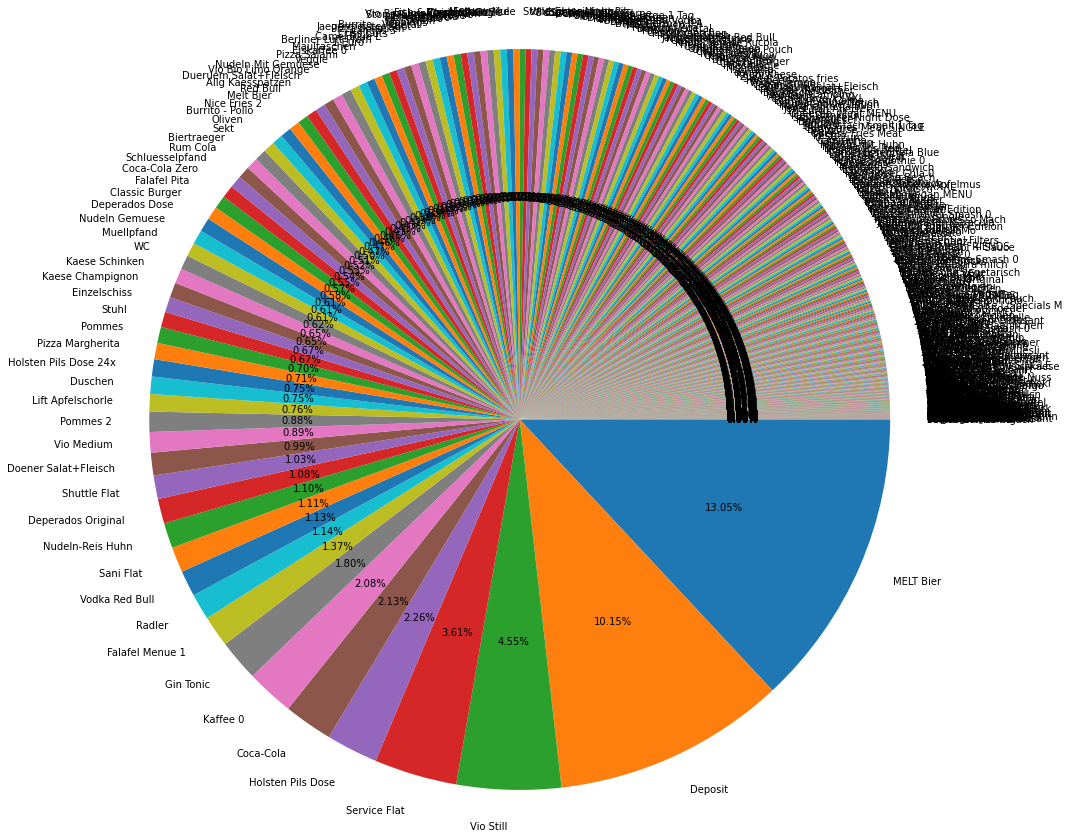

In [304]:
plt.figure(figsize=[15, 15])
sorted_counts = joined3['item_name'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False, autopct='%1.2f%%');
plt.axis('square')

# top 5 second highest selling items when someone enters the festival

In [277]:
second = joined.groupby('guest_id').nth(1) 
second

,order_id,timestamp,location_id,lineitem_id,item_id,quantity
guest_id,,,,,,
891228,5521523,2019-07-18 22:32:42,2111,7061448.0,7322.0,2.0
891229,5533801,2019-07-19 10:33:46,2116,7077685.0,7241.0,1.0
891230,5711636,2019-07-21 01:48:55,2195,7306758.0,7299.0,1.0
891231,5581669,2019-07-19 21:41:23,2158,7136899.0,6898.0,1.0
891232,5686932,2019-07-20 20:54:54,2182,7275309.0,7299.0,1.0
...,...,...,...,...,...,...
930175,5833295,2019-07-22 03:09:09,2147,7466315.0,6813.0,2.0
930176,5826708,2019-07-22 01:36:15,2199,7457869.0,7194.0,1.0
930177,5824558,2019-07-22 01:14:26,2141,7454922.0,6767.0,1.0


In [314]:
last = joined.groupby('guest_id').last()
last.head()

,order_id,timestamp,location_id,lineitem_id,item_id,quantity
guest_id,,,,,,
891228,5849026,2019-07-22 12:40:07,2208,7485997.0,6591.0,2.0
891229,5769969,2019-07-21 18:31:34,2152,7382304.0,5685.0,1.0
891230,5848675,2019-07-22 12:25:25,2208,7485586.0,6591.0,1.0
891231,5787584,2019-07-21 20:37:39,2152,7404963.0,5685.0,1.0
891232,5706725,2019-07-21 01:16:36,2193,7300310.0,7194.0,1.0


In [300]:
joined3 = pd.merge(second, items2, on=['item_id'], how='left')
joined3.head()

,order_id,timestamp,location_id,lineitem_id,item_id,quantity,item_name,category,department
0,5521523,2019-07-18 22:32:42,2111,7061448.0,7322.0,2.0,Stone Ripper Pale Ale,beer,drinks
1,5533801,2019-07-19 10:33:46,2116,7077685.0,7241.0,1.0,Egg Plate single,snack,food
2,5711636,2019-07-21 01:48:55,2195,7306758.0,7299.0,1.0,Vio Still,soft_drink,drinks
3,5581669,2019-07-19 21:41:23,2158,7136899.0,6898.0,1.0,Nutella,fast_food,food
4,5686932,2019-07-20 20:54:54,2182,7275309.0,7299.0,1.0,Vio Still,soft_drink,drinks


In [317]:
joined4 = pd.merge(last, items2, on = ['item_id'], how = 'left')
joined4.head()

,order_id,timestamp,location_id,lineitem_id,item_id,quantity,item_name,category,department
0,5849026,2019-07-22 12:40:07,2208,7485997.0,6591.0,2.0,Muellpfand,camping,non_food
1,5769969,2019-07-21 18:31:34,2152,7382304.0,5685.0,1.0,Iced Drinks 0,NaN,NaN
2,5848675,2019-07-22 12:25:25,2208,7485586.0,6591.0,1.0,Muellpfand,camping,non_food
3,5787584,2019-07-21 20:37:39,2152,7404963.0,5685.0,1.0,Iced Drinks 0,NaN,NaN
4,5706725,2019-07-21 01:16:36,2193,7300310.0,7194.0,1.0,Deposit,deposit,non_food


In [104]:
second['item_id'].value_counts()

7286.0    2932
7194.0    2145
6574.0     624
7299.0     598
7225.0     511
          ... 
6741.0       1
7219.0       1
7196.0       1
6725.0       1
7432.0       1
Name: item_id, Length: 596, dtype: int64

In [319]:
last['item_id'].value_counts()

7194.0    4818
6591.0    2944
7286.0    1075
7299.0     569
7233.0     385
          ... 
4684.0       1
7182.0       1
5687.0       1
6650.0       1
6569.0       1
Name: item_id, Length: 573, dtype: int64

(-1.1000057003045771,
 1.1097351505794293,
 -1.1092951575968564,
 1.10044569328715)

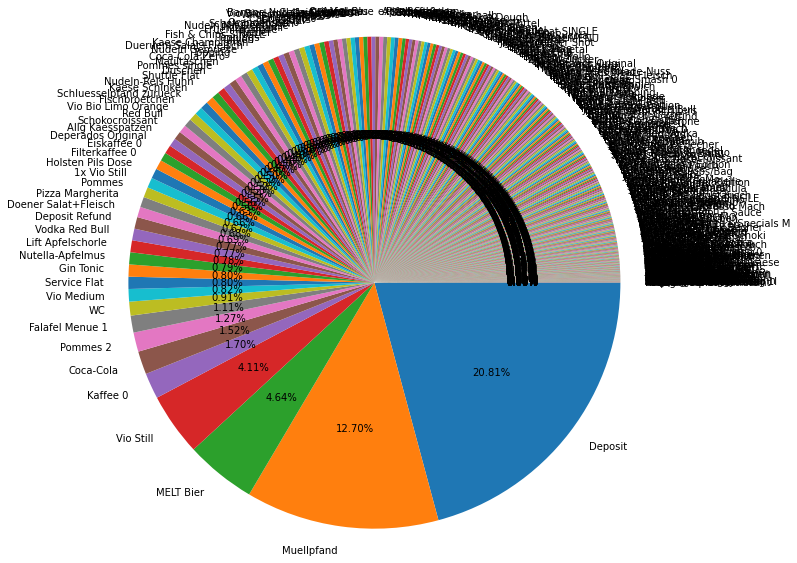

In [322]:
plt.figure(figsize=[10, 10])
sorted_counts = joined4['item_name'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False, autopct='%1.2f%%');
plt.axis('square')

In [320]:
items2.loc[7194, ["item_name", "category", "department"]]

item_name      Deposit
category       deposit
department    non_food
Name: 7194, dtype: object

In [105]:
items2.loc[7286, ["item_name", "category", "department"]]

item_name     MELT Bier
category       tap_beer
department       drinks
Name: 7286, dtype: object

In [107]:
items2.loc[7194, ["item_name", "category", "department"]]

item_name      Deposit
category       deposit
department    non_food
Name: 7194, dtype: object

In [108]:
items2.loc[6574, ["item_name", "category", "department"]]

item_name     Service Flat
category        facilities
department        non_food
Name: 6574, dtype: object

In [109]:
items2.loc[7299, ["item_name", "category", "department"]]

item_name      Vio Still
category      soft_drink
department        drinks
Name: 7299, dtype: object

In [110]:
items2.loc[7255, ["item_name", "category", "department"]]

item_name     Spende 5 Eur
category               nos
department           other
Name: 7255, dtype: object

* 1) MELT BIER : TAP BEER : DRINKS
* 2) DEPOSIT : DEPOSIT : NON FOOD
* 3) SERVICE FLAT : FACILITIES : NON FOOD
* 4) VIO STILL: SOFT DRINK : DRINK
* 5) SPENDE 5 EUR : NOS : OTHER

(-1.1000399935710758,
 1.1010331985779498,
 -1.10102304603211,
 1.1000501461169157)

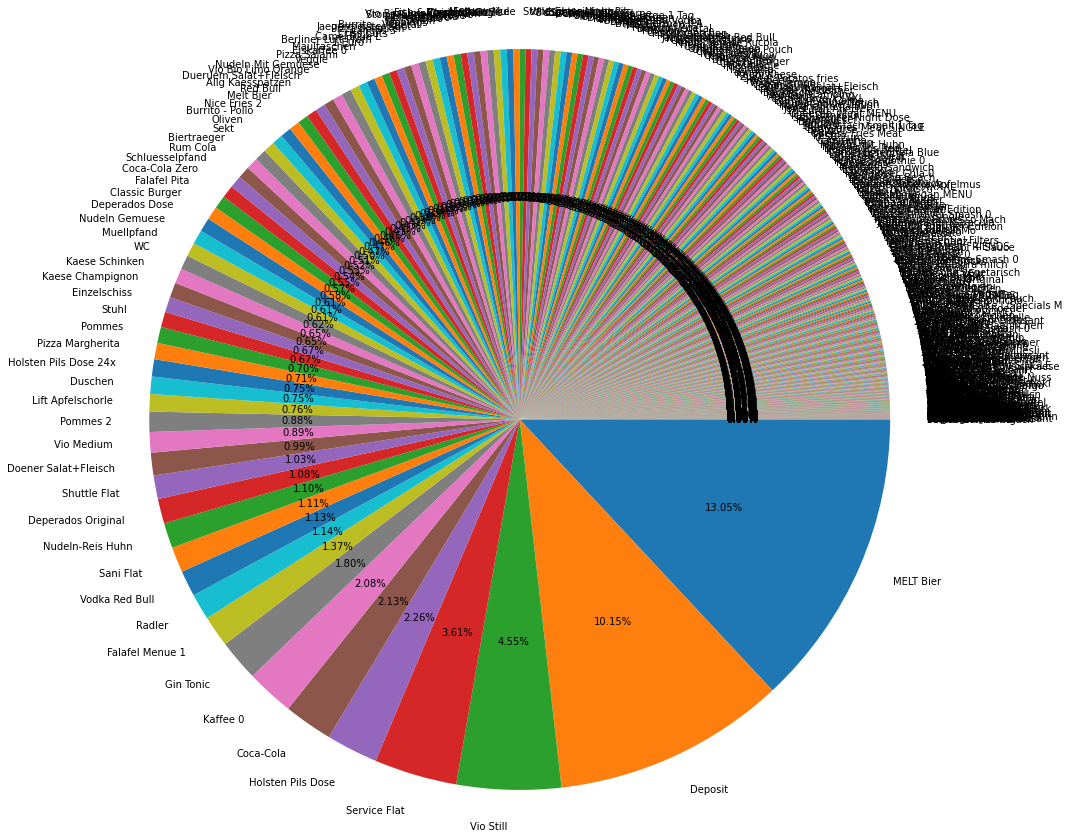

In [303]:
sorted_counts = joined3['item_name'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False);
plt.axis('square')

# Buyer personas


In [157]:
orders.head()

,order_id,timestamp,guest_id,location_id
0,5534725,2019-07-19 10:59:54,895058,2271
1,5539203,2019-07-19 12:40:27,895058,2205
2,5542976,2019-07-19 14:13:13,895058,2113
3,5551640,2019-07-19 17:03:49,895058,2253
4,5551659,2019-07-19 17:04:03,895058,2176


In [158]:
items.head()

,item_id,item_name,category,department
0,196,5,nos,other
1,747,10,nos,other
2,1836,Duschen,facilities,non_food
3,2092,Cocktails,spirit,drinks
4,2102,Shots,spirit,drinks


In [161]:
consume = pd.read_csv('consumptions per guest.csv', sep = ';')
consume.head()

,guest_id,beer,bottled_beer,cocktail,drinks_nos,energy_drink,hot_drinks,soft_drink,spirit,tap_beer,...,deposit,facilities,festival,merchandising,non_food_nos,tobacco,nos,cup,warranty,total_order_tkn
0,895058,1,0,0,0,0,2,5,2,8,...,22,0,1,0,0,3,0,0,0,9800
1,891232,0,0,0,0,0,0,2,4,0,...,3,0,0,0,0,0,0,0,0,4900
2,891272,1,0,0,0,0,0,0,8,5,...,15,1,0,0,0,0,0,0,0,10800
3,891264,10,0,0,0,0,0,3,0,4,...,4,1,1,1,0,1,0,0,0,15000
4,891259,0,0,0,1,0,1,10,0,0,...,2,0,0,0,0,1,0,0,0,13500


In [163]:
consume.describe()

,guest_id,beer,bottled_beer,cocktail,drinks_nos,energy_drink,hot_drinks,soft_drink,spirit,tap_beer,...,deposit,facilities,festival,merchandising,non_food_nos,tobacco,nos,cup,warranty,total_order_tkn
count,23190.000000,23190.000000,23190.0,23190.0,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,...,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.0,23190.0,23190.000000
mean,907735.267745,1.879776,0.0,0.0,0.404571,0.218672,0.712980,2.425830,1.860845,3.638163,...,7.883614,0.723760,0.173480,0.045364,0.000776,0.371281,0.117206,0.0,0.0,8402.327641
std,10850.467041,3.879657,0.0,0.0,0.991975,0.806955,1.441719,3.128605,3.671419,5.491571,...,10.601364,1.084359,0.463004,0.249911,0.029358,0.988992,0.733007,0.0,0.0,6519.603684
min,891228.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,898684.250000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3620.000000
50%,906275.500000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6850.000000
75%,915436.250000,2.000000,0.0,0.0,0.000000,0.000000,1.000000,3.000000,2.000000,5.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,11730.000000
max,930205.000000,52.000000,0.0,0.0,18.000000,29.000000,16.000000,41.000000,61.000000,70.000000,...,342.000000,15.000000,8.000000,8.000000,2.000000,67.000000,40.000000,0.0,0.0,68020.000000


In [167]:
lineitems

,lineitem_id,order_id,item_id,quantity
0,7078862,5534725,7226,1
1,7084349,5539203,6577,1
2,7088719,5542976,7064,1
3,7099035,5551640,7287,1
4,7099058,5551659,6127,1
...,...,...,...,...
441283,7456443,5825673,7194,1
441284,7460516,5828708,6917,1
441285,7460729,5828870,6955,4
441286,7460730,5828870,7339,1


In [171]:
total = pd.merge(joined, items, on=['item_id'], how='left')
total

,order_id,timestamp,guest_id,location_id,lineitem_id,item_id,quantity,item_name,category,department
0,5534725,2019-07-19 10:59:54,895058,2271,7078862.0,7226.0,1.0,Holsten Pils Dose 24x,beer,drinks
1,5539203,2019-07-19 12:40:27,895058,2205,7084349.0,6577.0,1.0,Service Flat,festival,non_food
2,5542976,2019-07-19 14:13:13,895058,2113,7088719.0,7064.0,1.0,Salamib. & Salamib,snack,food
3,5551640,2019-07-19 17:03:49,895058,2253,7099035.0,7287.0,1.0,Biertraeger,tap_beer,drinks
4,5551659,2019-07-19 17:04:03,895058,2176,7099058.0,6127.0,1.0,Camel Yellow L,tobacco,non_food
...,...,...,...,...,...,...,...,...,...,...
441440,5825673,2019-07-22 01:25:19,930179,2185,7456443.0,7194.0,1.0,Deposit,deposit,non_food
441441,5828708,2019-07-22 02:01:52,930180,2161,7460516.0,6917.0,1.0,Pommes 2,fast_food,food
441442,5828870,2019-07-22 02:04:16,930180,2166,7460729.0,6955.0,4.0,Extra,snack,food
441443,5828870,2019-07-22 02:04:16,930180,2166,7460730.0,7339.0,1.0,Extra 0,NaN,NaN


In [172]:
total['item_name'].value_counts()

Deposit                     91719
MELT Bier                   54527
Vio Still                   21425
Coca-Cola                    9566
Service Flat                 7483
                            ...  
Schoko Bowl                     1
Compact Hammock                 1
Mini Backpack 20                1
Vodka Red Bull Summer 1l        1
corn dog gross                  1
Name: item_name, Length: 721, dtype: int64

In [174]:
total['category'].value_counts()

deposit          90227
fast_food        74574
tap_beer         57116
soft_drink       46671
spirit           31441
beer             25226
snack            17526
camping          16646
facilities       16227
tobacco           8012
sweets            6583
slow_food         5291
energy_drink      4562
hot_drinks        3840
wine              3720
festival          3705
food_nos          2301
nos               1972
drinks_nos        1249
ice_cream         1016
merchandising      999
non_food_nos        17
Name: category, dtype: int64

In [175]:
total['department'].value_counts()

drinks      173825
non_food    135833
food        107291
other         1972
Name: department, dtype: int64

(-1.100069704648489,
 1.1091427322582004,
 -1.1087908124424313,
 1.1004216244642582)

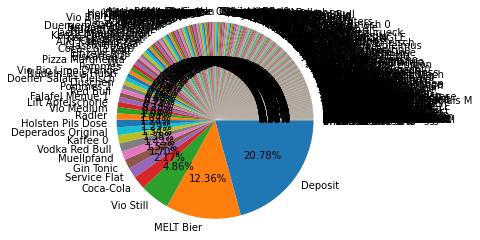

In [290]:
sorted_counts = total['item_name'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False, autopct='%1.2f%%');
plt.axis('square')

(-1.109679799273831,
 1.1102543284708113,
 -1.1178320631384073,
 1.102102064606235)

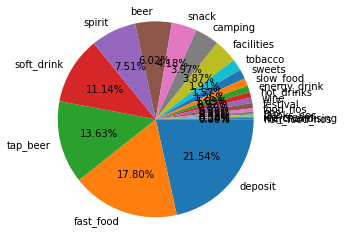

In [291]:
sorted_counts = total['category'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False, autopct='%1.2f%%');
plt.axis('square')

(-1.1041758299357085,
 1.1279532748919505,
 -1.1238384241863546,
 1.1082906806413044)

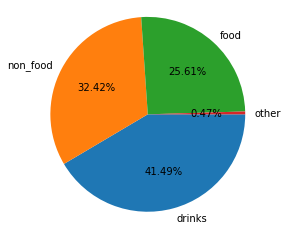

In [292]:
sorted_counts = total['department'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index,
       counterclock= False, autopct='%1.2f%%');
plt.axis('square')

* 1) It seem the highest type of thing people buy tend to be desposits as it holds the highest share for items and category chart, and also has a large chunk for the department with non_food. We an infer pretty easily that most poeple tend to ask for services for deposits in the festival

* 2) From The category and department charts, a lot of people tend to go for and order drinks as it takes of 41.49% of the departments chart and over 30% of the Category chart

* 3) For the first purchases, people tend to go for deposits with around 13% and then MELT beer with around 10%

* 4) For the second purchases, people usually buy MELT beers (13.05%) and then deposits(around 10%), so those are pretty good to stock up in the beginning.

* 5) The best non food are deposits, the best food people buy is fast food, and the drink people buy the most is tap beer

# Top Ups


In [178]:
topup = pd.read_excel("top-up-planning.xlsx")
topup

,Received date,Received time,Received hour,Refill location,Operator ID,Amount
0,19/07/2021,06:12,6,Top-up C 1.2,12,-20.0
1,19/07/2021,06:14,6,Top-up C 1.2,12,-4.7
2,19/07/2021,06:14,6,Top-up C 1.2,12,-13.2
3,19/07/2021,06:14,6,Top-up C 1.2,12,-16.2
4,19/07/2021,06:16,6,Top-up C 1.2,12,-8.6
...,...,...,...,...,...,...
665,19/07/2021,13:37,13,Top-up C 1.3,13,-10.6
666,19/07/2021,13:37,13,Top-up C 1.3,13,-26.4
667,19/07/2021,13:37,13,Top-up C 1.3,13,-7.8
668,19/07/2021,13:37,13,Top-up C 1.3,13,-19.7


In [311]:
topup['Received hour'].value_counts()

10    177
13    142
11    111
9     109
12     49
8      44
7      25
6      13
Name: Received hour, dtype: int64

(-1.1155859093869422,
 1.1096571322450577,
 -1.1095324790739458,
 1.1157105625580541)

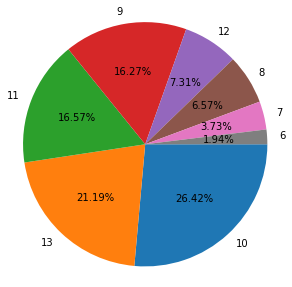

In [312]:
plt.figure(figsize = [10, 5])
sorted_counts = topup['Received hour'].value_counts()
plt.pie(sorted_counts, labels=sorted_counts.index, autopct='%1.2f%%',
       counterclock= False);
plt.axis('square')

In [183]:
topup['Refill location'].value_counts()

Top-up C 1.1    211
Top-up C 1.2    159
Top-up C 1.3    136
Top-up C 2.4     72
Top-up C 2.5     62
Top-up C2.6      30
Name: Refill location, dtype: int64

In [184]:
topup2 = topup.set_index('Refill location')
topup2

,Received date,Received time,Received hour,Operator ID,Amount
Refill location,,,,,
Top-up C 1.2,19/07/2021,06:12,6,12,-20.0
Top-up C 1.2,19/07/2021,06:14,6,12,-4.7
Top-up C 1.2,19/07/2021,06:14,6,12,-13.2
Top-up C 1.2,19/07/2021,06:14,6,12,-16.2
Top-up C 1.2,19/07/2021,06:16,6,12,-8.6
...,...,...,...,...,...
Top-up C 1.3,19/07/2021,13:37,13,13,-10.6
Top-up C 1.3,19/07/2021,13:37,13,13,-26.4
Top-up C 1.3,19/07/2021,13:37,13,13,-7.8


In [191]:
station1 = topup2.loc["Top-up C 1.1", ["Received hour", "Amount"]]
station1

,Received hour,Amount
Refill location,,
Top-up C 1.1,7,-41.0
Top-up C 1.1,7,-85.0
Top-up C 1.1,7,-4.4
Top-up C 1.1,7,-20.0
Top-up C 1.1,7,15.0
...,...,...
Top-up C 1.1,13,10.0
Top-up C 1.1,13,-2.6
Top-up C 1.1,13,-11.0


In [190]:
station1['Received hour'].value_counts()

10    53
11    51
9     42
8     26
12    23
7     10
13     6
Name: Received hour, dtype: int64

In [197]:
amount = station1.set_index("Received hour")
amount

,Amount
Received hour,
7,-41.0
7,-85.0
7,-4.4
7,-20.0
7,15.0
...,...
13,10.0
13,-2.6
13,-11.0


In [199]:
amount2 = amount.loc[10, ["Amount"]]

In [200]:
amount2['Amount'].sum()

-572.0

###### Top-up C 1.1 gets 211 transactions over the entire day
###### Top-up C 1.1 gets the most transactions during hour 10 throughout the day where it gets 53 transactions making 572€ 

In [192]:
station2 = topup2.loc["Top-up C 1.2", ["Received hour", "Amount"]]
station2

,Received hour,Amount
Refill location,,
Top-up C 1.2,6,-20.0
Top-up C 1.2,6,-4.7
Top-up C 1.2,6,-13.2
Top-up C 1.2,6,-16.2
Top-up C 1.2,6,-8.6
...,...,...
Top-up C 1.2,12,-6.8
Top-up C 1.2,12,0.2
Top-up C 1.2,12,-0.4


In [194]:
station2['Received hour'].value_counts()

10    61
9     29
11    27
12    17
6     11
8      8
7      4
13     2
Name: Received hour, dtype: int64

In [203]:
a3 = station2.set_index("Received hour")
a3

,Amount
Received hour,
6,-20.0
6,-4.7
6,-13.2
6,-16.2
6,-8.6
...,...
12,-6.8
12,0.2
12,-0.4


In [240]:
a3 = amount.loc[10, ["Amount"]]
a3

,Amount
Received hour,
10,-7.6
10,4.0
10,-7.8
10,-20.0
10,-29.2
...,...
10,-17.4
10,-5.1
10,-14.0


In [205]:
a3['Amount'].sum()

-850.2

###### - Top-up C 1.2 gets 159 transactions over the entire day
###### - Top-up C 1.2 gets the most transactions during hour 10 throughout the day where it makes 850.2€ 

In [212]:
station3 = topup2.loc["Top-up C 1.3", ["Received hour", "Amount"]]
station3

,Received hour,Amount
Refill location,,
Top-up C 1.3,6,10.0
Top-up C 1.3,6,-10.0
Top-up C 1.3,13,-33.7
Top-up C 1.3,13,10.0
Top-up C 1.3,13,-10.4
...,...,...
Top-up C 1.3,13,-10.6
Top-up C 1.3,13,-26.4
Top-up C 1.3,13,-7.8


In [213]:
station3['Received hour'].value_counts()

13    134
6       2
Name: Received hour, dtype: int64

In [214]:
a4 = station3.set_index("Received hour")
a4

,Amount
Received hour,
6,10.0
6,-10.0
13,-33.7
13,10.0
13,-10.4
...,...
13,-10.6
13,-26.4
13,-7.8


In [242]:
a5 = a4.loc[13, ["Amount"]]
a5

,Amount
Received hour,
13,-33.7
13,10.0
13,-10.4
13,-13.7
13,-51.1
...,...
13,-10.6
13,-26.4
13,-7.8


In [217]:
a5['Amount'].sum()

-1955.8

###### - Top-up C 1.3 gets 136 transactions over the entire day
###### - Top-up C 1.3 gets the most transactions during hour 13 throughout the day where it makes 1995.8€ 

In [218]:
station4 = topup2.loc["Top-up C 2.4", ["Received hour", "Amount"]]
station4

,Received hour,Amount
Refill location,,
Top-up C 2.4,7,15.0
Top-up C 2.4,7,-5.4
Top-up C 2.4,7,-23.9
Top-up C 2.4,8,-30.0
Top-up C 2.4,8,-10.0
...,...,...
Top-up C 2.4,12,-30.0
Top-up C 2.4,12,-58.0
Top-up C 2.4,12,-22.6


In [219]:
station4['Received hour'].value_counts()

10    26
9     18
11    14
8      6
12     5
7      3
Name: Received hour, dtype: int64

In [221]:
a6 = station4.set_index("Received hour")
a6

,Amount
Received hour,
7,15.0
7,-5.4
7,-23.9
8,-30.0
8,-10.0
...,...
12,-30.0
12,-58.0
12,-22.6


In [244]:
a7 = a6.loc[10, ["Amount"]]
a7.shape


(26, 1)

In [223]:
a7['Amount'].sum()

-496.7

###### - Top-up C 2.4 gets 72 transactions over the entire day
###### - Top-up C 2.4 gets the most transactions during hour 10 throughout the day where it makes 496.7€ 

In [224]:
station5 = topup2.loc["Top-up C 2.5", ["Received hour", "Amount"]]
station5

,Received hour,Amount
Refill location,,
Top-up C 2.5,7,-45.5
Top-up C 2.5,7,-10.6
Top-up C 2.5,7,-15.0
Top-up C 2.5,7,-22.1
Top-up C 2.5,7,10.0
...,...,...
Top-up C 2.5,11,-33.6
Top-up C 2.5,11,-0.2
Top-up C 2.5,12,-5.0


In [225]:
station5['Received hour'].value_counts()

10    28
9     14
11     8
7      6
8      3
12     3
Name: Received hour, dtype: int64

In [227]:
a8 = station5.set_index("Received hour")
a8

,Amount
Received hour,
7,-45.5
7,-10.6
7,-15.0
7,-22.1
7,10.0
...,...
11,-33.6
11,-0.2
12,-5.0


In [232]:
a9 = a8.loc[10, ["Amount"]]
a9['Amount'].sum()

-500.9

In [245]:
a9.shape

(28, 1)

###### - Top-up C 2.5 gets 62 transactions over the entire day
###### - Top-up C 2.5 gets the most transactions during hour 10 throughout the day where it makes 500.9€ 

In [233]:
station6 = topup2.loc["Top-up C2.6", ["Received hour", "Amount"]]
station6

,Received hour,Amount
Refill location,,
Top-up C2.6,7,-8.2
Top-up C2.6,7,-6.0
Top-up C2.6,8,-1.3
Top-up C2.6,9,-4.5
Top-up C2.6,9,-0.9
Top-up C2.6,9,-1.2
Top-up C2.6,9,-6.7
Top-up C2.6,9,-5.5
Top-up C2.6,9,-13.5


In [234]:
station6.shape

(30, 2)

In [235]:
station6['Received hour'].value_counts()

11    11
10     9
9      6
7      2
8      1
12     1
Name: Received hour, dtype: int64

In [237]:
a10 = station6.set_index("Received hour")


In [238]:
a11 = a10.loc[11, ["Amount"]]
a11

,Amount
Received hour,
11,-15.0
11,-2.2
11,-55.0
11,-5.7
11,-3.3
11,10.0
11,-4.2
11,-40.0
11,-14.0


In [239]:
a11['Amount'].sum()

-179.4

###### - Top-up C 2.6 gets 30 transactions over the entire day
###### - Top-up C 2.6 gets the most transactions during hour 11 throughout the day where it makes 179.4€ 